In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



In [14]:
df = pd.read_csv("Node_0.csv")


In [ ]:
nodeids = df['nodeid'].unique()
len(nodeids)

['b1f98eed32dcd1bcb575af5f483ab12c3b7981b7d25c6595a54de6376c381c22'
 '50f7c53d8692424fbe603c78b4e61c19276a7823df7a85f1767762054213dec7'
 '02d27a3d3bfa1b60f607ef05c14d2e37ef2fdb271e32e79ed483235a095c8010' ...
 'd5c7783ceb018410f05fe8ea4c3b30d16754365ed53ad06038020f712302005c'
 '0d0c16b872b31ae9e4e16ff14b807625b0708ac9cc035f9685367a97301e89f2'
 '270ead29549f325fe2b0bd29e849a16c9fbe201b9e0f5b9b8df66d1b4cbae8e4']


In [39]:

def multiple_vs_time(x):
    node_df = df[df['nodeid']==nodeids[x]].copy()
    node_df.sort_values('timestamp', inplace=True)
    node_df.plot(x='timestamp', y='node_cpu_usage')
    plt.ylabel('CPU Usage')
    plt.show()
    node_df.plot(x='timestamp', y='node_memory_usage')
    plt.ylabel('Memory usage')
    plt.show()

In [40]:
interact(multiple_vs_time, x=widgets.IntSlider(min=0, max=len(nodeids)-1, step=1, value=0))  


interactive(children=(IntSlider(value=0, description='x', max=13117), Output()), _dom_classes=('widget-interac…

<function __main__.multiple_vs_time(x)>

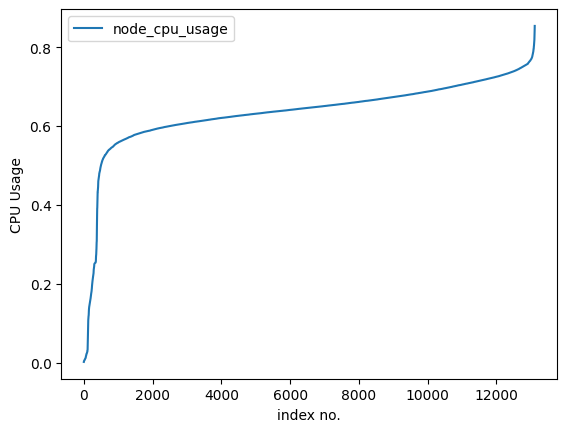

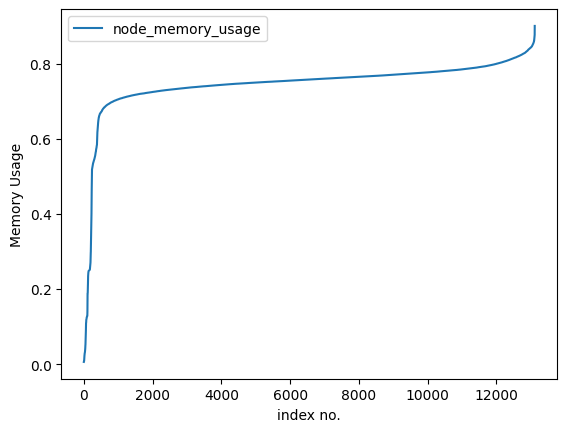

In [38]:
def singlenode_vs_time():
    mean_df = df.groupby('nodeid', as_index=False)[['node_cpu_usage', 'node_memory_usage']].mean()
    mean_df = mean_df.sort_values('node_cpu_usage').reset_index(drop=True)
    mean_df.plot(use_index=True, y='node_cpu_usage')
    plt.xlabel('index no.')
    plt.ylabel('CPU Usage')
    plt.show()
    mean_df = mean_df.sort_values('node_memory_usage').reset_index(drop=True)
    mean_df.plot(use_index=True, y='node_memory_usage')
    plt.xlabel('index no.')
    plt.ylabel('Memory Usage')
    plt.show()
singlenode_vs_time()